In [1]:
import pickle
import numpy as np

file_path = '/mnt/4T-HD/qing/intermediate/feat_pickle/'
fname = file_path + 'all_simmat.pickle'
with open(fname, 'rb') as fh:
    mat_dis1, mat_dis2 = pickle.load(fh)
    
print(mat_dis1.shape)

(3549, 3549)


In [2]:
asp_ratio = []
types = []
view_point = []
objects = ['car', 'aeroplane', 'bicycle', 'bus', 'motorbike', 'train']
for oo in objects:
    fname = file_path + 'res_info_' + oo + '_train.pickle'
    print('loading object {0}'.format(oo))
    with open(fname, 'rb') as fh:
        l, _, v = pickle.load(fh)
        types += [oo for ii in range(len(v))]
        view_point += v
        asp_ratio += [l[ii].shape[1]/l[ii].shape[0] for ii in range(len(v))]
        
N = len(types)
print('total number of instances {0}'.format(N))

loading object car
loading object aeroplane
loading object bicycle
loading object bus
loading object motorbike
loading object train
total number of instances 3549


(3549, 3549)
0.0904788392279
0.0806319577416


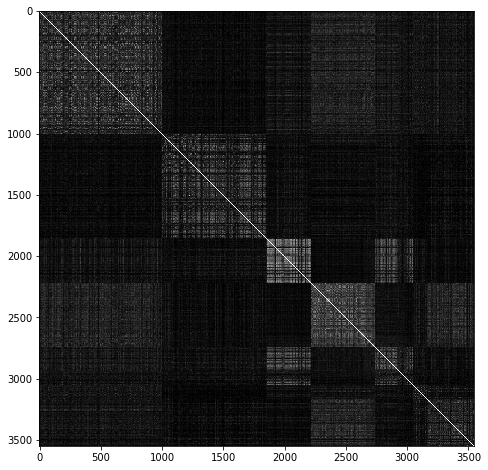

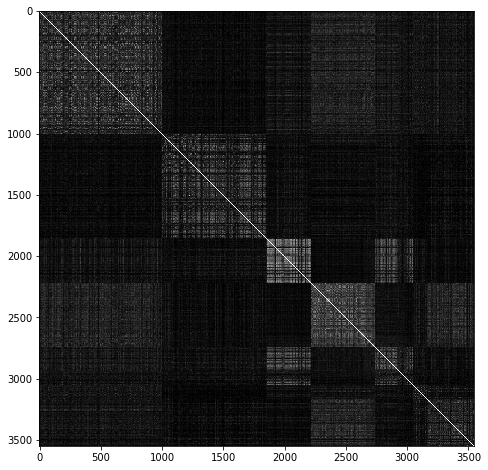

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# perm_id = np.random.permutation(N)
# perm_inv_id = np.argsort(perm_id)
perm_id = np.array(range(N))
perm_inv_id = np.array(range(N))

types = np.array(types)[perm_id]
view_point = np.array(view_point)[perm_id]
asp_ratio = np.array(asp_ratio)[perm_id]

gridix = np.ix_(perm_id,perm_id)
gridix_inv = np.ix_(perm_inv_id,perm_inv_id)

mat_dis = mat_dis1
mat_full = np.ones_like(mat_dis)
for nn in range(mat_full.shape[0]):
    mat_full[nn] = np.append(mat_dis[0:nn, nn], mat_dis[nn, nn:])
    
mat_full = mat_full[gridix]
print(mat_full.shape)

np.fill_diagonal(mat_full, 0)

W_mat = 1. - mat_full
print(np.mean(W_mat))
print(np.std(W_mat))

plt.imshow(W_mat, interpolation='none')
plt.show()

W_mat_o = W_mat[gridix_inv]
plt.imshow(W_mat_o, interpolation='none')
plt.show()

In [4]:
asp_ratio = np.array(asp_ratio)
print(np.min(asp_ratio), np.max(asp_ratio), np.mean(asp_ratio))

1.0 1.0 1.0


In [5]:
for rr in np.random.randint(3549,size=10):
    ref = rr
    print(types[ref], view_point[ref])
    dis_rst = mat_full[rr]
    min_idx = np.argsort(dis_rst)
    for tt in range(5):
        match = min_idx[tt]
        print(types[match], view_point[match], end=' ')
        
    print('.')

train 340
train 340 train 335 train 345 train 340 train 330 .
aeroplane 55
aeroplane 55 aeroplane 55 aeroplane 50 aeroplane 30 aeroplane 40 .
bicycle 355
bicycle 355 bicycle 30 bicycle 25 bicycle 335 motorbike 240 .
train 0
train 0 train 355 train 0 train 5 train 5 .
car 70
car 70 car 55 car 90 car 75 car 45 .
bicycle 90
bicycle 90 bicycle 270 bicycle 70 bicycle 270 bicycle 90 .
train 355
train 355 train 345 train 345 train 340 train 345 .
car 15
car 15 car 15 car 20 bus 10 car 20 .
aeroplane 305
aeroplane 305 aeroplane 285 aeroplane 280 aeroplane 305 aeroplane 285 .
bicycle 45
bicycle 45 bicycle 45 bicycle 45 bicycle 45 bicycle 90 .


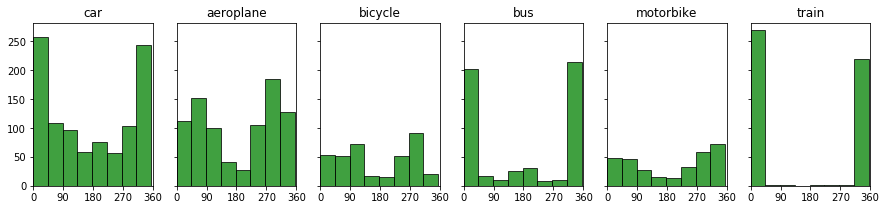

In [6]:
f, axes = plt.subplots(1,6, sharex=True, sharey=True, figsize=(15,3))
for io, oo in enumerate(objects):
    vps = np.array(view_point)[np.array(types)==oo]
    axes[io].hist(vps, 8,  facecolor='green', alpha=0.75,edgecolor='k')
    axes[io].set_title(oo)

axes[0].set_xlim([0,360])
axes[0].set_xticks([0,90,180,270,360])
# plt.savefig(file_path+'vp_hist.png', bbox_inches = 'tight')
plt.show()

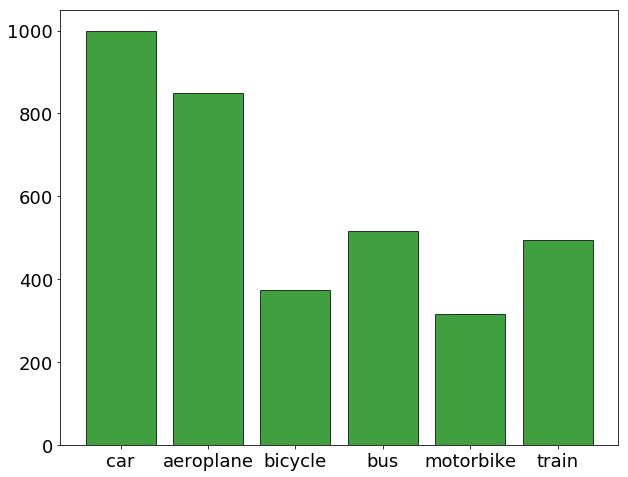

In [6]:
freq = []
for oo in objects:
    freq.append(sum(np.array(types)==oo))

pos = np.arange(len(objects))

ax = plt.axes()
ax.set_xticks(pos)
ax.set_xticklabels(objects)
ax.tick_params(axis='both', which='major', labelsize=18)

plt.bar(pos, freq, color='green',alpha=0.75, edgecolor='k')
plt.show()

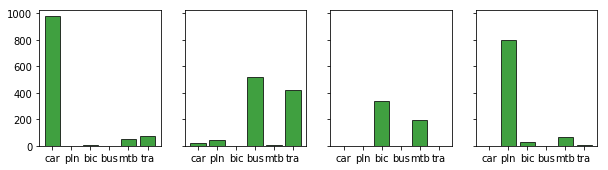

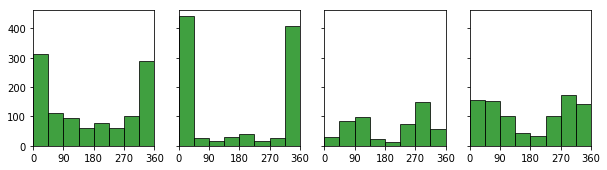

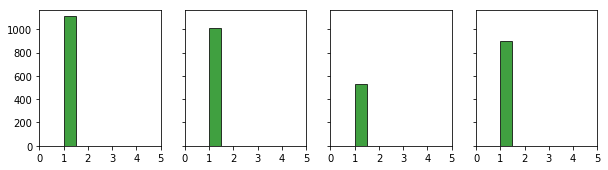

In [7]:
from sklearn.cluster import SpectralClustering
objects_s = ['car','pln','bic','bus','mtb','tra']
K = 4
cls_solver = SpectralClustering(n_clusters=K,affinity='precomputed', random_state=666)
lb = cls_solver.fit_predict(W_mat)
    
f, axes = plt.subplots(1,K, sharex=True, sharey=True, figsize=(10,2.5))
pos = np.arange(len(objects))
axes[0].set_xticks(pos)
axes[0].set_xticklabels(objects_s)
for k in range(K):
    freq = []
    for oo in objects:
        freq.append(sum(np.array(types)[lb==k]==oo))
        
    axes[k].bar(pos, freq, color='green',alpha=0.75, edgecolor='k')

plt.show()

f, axes = plt.subplots(1,K, sharex=True, sharey=True, figsize=(10,2.5))
axes[0].set_xlim([0,360])
axes[0].set_xticks([0,90,180,270,360])

for k in range(K):
    axes[k].hist(np.array(view_point)[lb==k], bins=8, range=[0,360], facecolor='green', alpha=0.75,edgecolor='k')

plt.show()

f, axes = plt.subplots(1,K, sharex=True, sharey=True, figsize=(10,2.5))
axes[0].set_xlim([0,5])
axes[0].set_xticks([0,1,2,3,4,5])

for k in range(K):
    axes[k].hist(asp_ratio[lb==k], bins=10, range=[0,5], facecolor='green', alpha=0.75,edgecolor='k')

plt.show()

In [8]:
idx2 = []
W_mat2 = []
lb2 = []
for k in range(K):
    idx2.append(np.where(lb==k)[0])
    W_mat2.append(W_mat[np.ix_(idx2[k],idx2[k])])
    print(np.mean(W_mat2[k]), np.std(W_mat2[k]))
    
    cls_solver = SpectralClustering(n_clusters=2,affinity='precomputed', random_state=999)
    lb2.append(cls_solver.fit_predict(W_mat2[k]))

0.165829261642 0.105033466553
0.14872301383 0.0893483631721
0.274098768288 0.125942760895
0.149753807594 0.105173839803


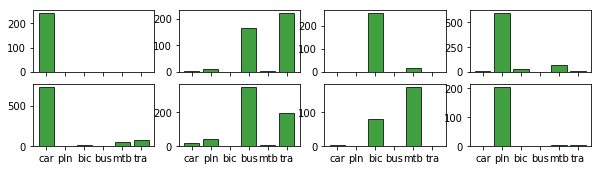

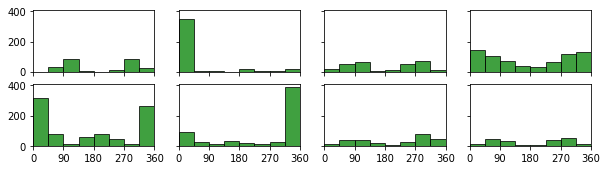

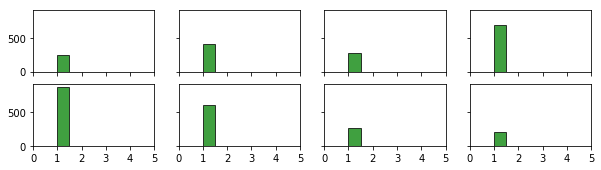

In [10]:
K2=2
f, axes = plt.subplots(2,K, sharex=True, sharey=False, figsize=(10,2.5))
pos = np.arange(len(objects))
axes[0][0].set_xticks(pos)
axes[0][0].set_xticklabels(objects_s)
for k in range(K2*K):
    a = k//2
    b = k%2
    freq = []
    for oo in objects:
        freq.append(sum(np.array(types)[idx2[a]][lb2[a]==b]==oo))
        
    axes[b][a].bar(pos, freq, color='green',alpha=0.75, edgecolor='k')

plt.show()
    
f, axes = plt.subplots(2,K, sharex=True, sharey=True, figsize=(10,2.5))
axes[0][0].set_xlim([0,360])
axes[0][0].set_xticks([0,90,180,270,360])
for k in range(K2*K):
    a = k//2
    b = k%2
    axes[b][a].hist(np.array(view_point)[idx2[a]][lb2[a]==b], bins=8, range=[0,360], facecolor='green', alpha=0.75, edgecolor='k')

plt.show()

f, axes = plt.subplots(2,K, sharex=True, sharey=True, figsize=(10,2.5))
axes[0][0].set_xlim([0,5])
axes[0][0].set_xticks([0,1,2,3,4,5])
for k in range(K2*K):
    a = k//2
    b = k%2
    axes[b][a].hist(np.array(asp_ratio)[idx2[a]][lb2[a]==b], bins=10, range=[0,5], facecolor='green', alpha=0.75, edgecolor='k')

plt.show()

In [11]:
idx3 = []
W_mat3 = []
lb3 = []
for k in range(K2):
    a = k//2
    b = k%2
    idx3.append(np.where(lb2[a]==b)[0])
    W_mat3.append(W_mat2[a][np.ix_(idx3[k],idx3[k])])
    print(np.mean(W_mat3[k]), np.std(W_mat3[k]))
    cls_solver = SpectralClustering(n_clusters=2,affinity='precomputed', random_state=999)
    lb3.append(cls_solver.fit_predict(W_mat3[k]))
    

0.335499868211 0.130839337333
0.165531875959 0.105791401457


IndexError: list index out of range

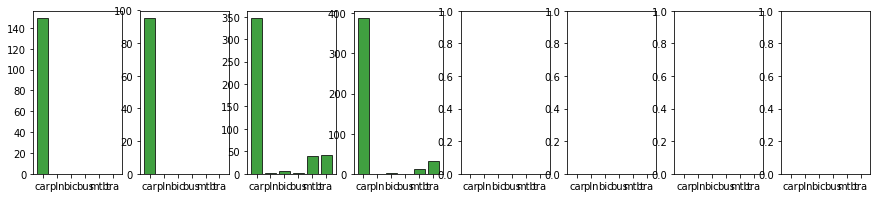

In [12]:
K3=8
    
f, axes = plt.subplots(1,K3, sharex=True, sharey=False, figsize=(15,3))
pos = np.arange(len(objects))
axes[0].set_xticks(pos)
axes[0].set_xticklabels(objects_s)
for k in range(K3):
    a = k//2
    c = k//4
    b = k%2
    freq = []
    for oo in objects:
        freq.append(sum(np.array(types)[idx2[c]][idx3[a]][lb3[a]==b]==oo))
        
    axes[k].bar(pos, freq, color='green',alpha=0.75, edgecolor='k')

plt.show()
f, axes = plt.subplots(1, K3, sharex=True, sharey=True, figsize=(15,3))
axes[0].set_xlim([0,360])
axes[0].set_xticks([0,90,180,270,360])
for k in range(K3):
    a = k//2
    c = k//4
    b = k%2
    axes[k].hist(np.array(view_point)[idx2[c]][idx3[a]][lb3[a]==b], bins=8,range=[0,360],  
                 facecolor='green', alpha=0.75, edgecolor='k')

plt.show()